# Lab Session 10: Introduction to Natural Language Processing 

> Friday 11-14-2025, 9AM-11AM & 1PM-3PM & 3PM-5PM
>
> Instructors: Instructors: [Jimmy Butler](https://statistics.berkeley.edu/people/james-butler) & [Sequoia Andrade](https://statistics.berkeley.edu/people/sequoia-rose-andrade)

What's planned for today:
1. **Text Data Loading**: We will review text data loading using a dataset of fake and real news. We will perform exploratory data analysis on it.
2. **Text Data Processing**: We will practice text processing using the SpaCy package, including lemmatization and word frequency counts.
3. **Topic Modeling**: We will start discussing topic modeling and demonstrate how to build topic models.

# Text Data Loading

1. First load the "Fake" and "True" data into dataframes from csvs
2. Make two plots:
   - One that is the distribution of subjects over the Fake dataset
   - One that is the distribution of subjects over the True dataset
3. Make one plot with two lines that have the count of reports (y-axis) per month per year (x-axis) with one line for True and one line for Fake
4. Make two plots:
   - One that is the distribution of Text length over the Fake dataset (histogram)
   - One that is the distribution of Text length over the True dataset (histogram)

In [1]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
# load data
fake = pd.read_csv("fake-and-real-news-dataset/Fake.csv")
real = pd.read_csv("fake-and-real-news-dataset/True.csv")

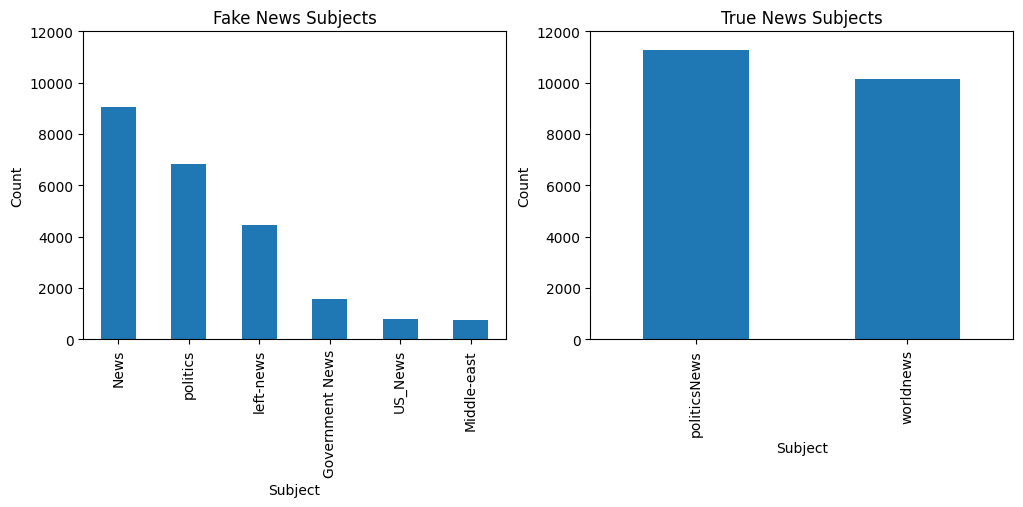

In [3]:
# plots
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
# plot values
fake["subject"].value_counts().plot(kind="bar", ax=ax[0])
real["subject"].value_counts().plot(kind="bar", ax=ax[1])
# add titles, clean up axes
ax[0].set_title("Fake News Subjects")
ax[0].set_xlabel("Subject")
ax[0].set_ylabel("Count")
ax[0].set_ylim(0,12000)
ax[1].set_title("True News Subjects")
ax[1].set_xlabel("Subject")
ax[1].set_ylabel("Count")
ax[1].set_ylim(0,12000)
plt.show()

In [4]:
fake["Date Clean"] = pd.to_datetime(fake["date"],format='mixed', dayfirst=True, errors='coerce') 
#moral of the story is strings suck

In [5]:
real["Date Clean"] = pd.to_datetime(real["date"],format='mixed', dayfirst=True, errors='coerce') 
#moral of the story is strings suck

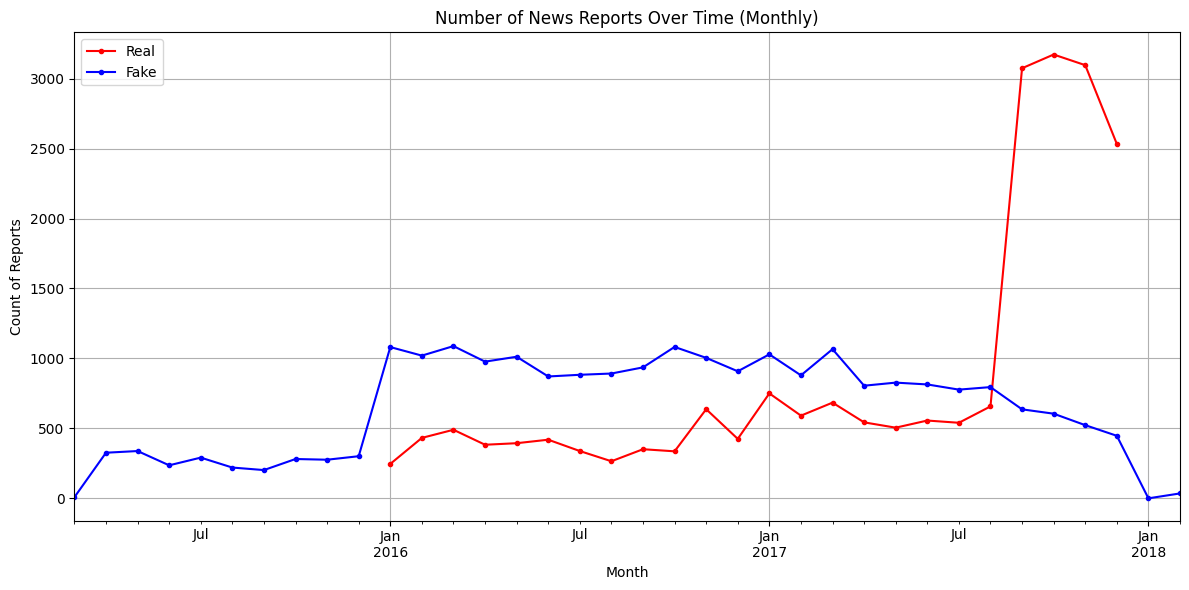

In [6]:
# Get Aggregated Data

real_monthly_counts = real.groupby(pd.Grouper(key='Date Clean', freq='ME')).size()
fake_monthly_counts = fake.groupby(pd.Grouper(key='Date Clean', freq='ME')).size()
# Plot the Aggregated Data ---
fig, ax = plt.subplots(figsize=(12, 6))
# We plot the 'monthly_counts' Series.
real_monthly_counts.plot(kind='line', marker='.', linestyle='-', ax=ax, color='r', label="Real")
fake_monthly_counts.plot(kind='line', marker='.', linestyle='-', ax=ax, color='b', label="Fake")

# Add titles and labels
plt.title('Number of News Reports Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Count of Reports')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
fake["Text Length"] = fake["text"].apply(len)
real["Text Length"] = real["text"].apply(len)

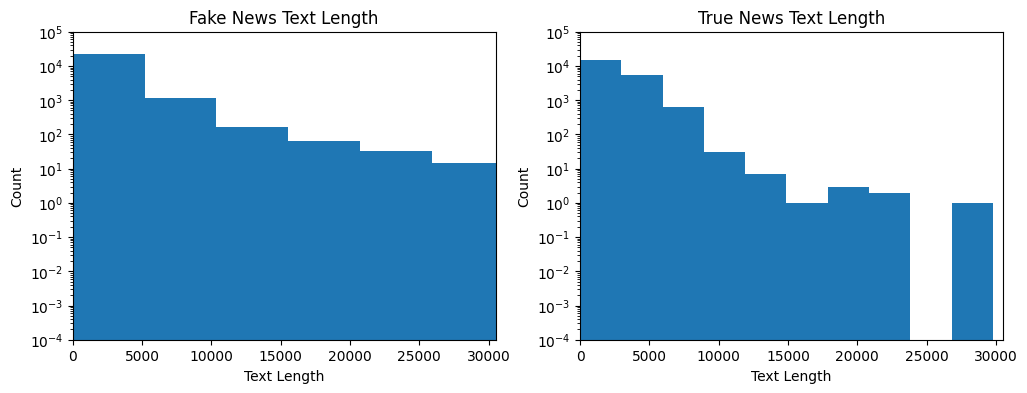

In [8]:
# plots - are fake news articles significantly shorter than real news? 
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
# plot values
fake["Text Length"].plot(kind="hist", ax=ax[0])
real["Text Length"].plot(kind="hist", ax=ax[1])
# add titles, clean up axes
ax[0].set_title("Fake News Text Length")
ax[0].set_xlabel("Text Length")
ax[0].set_ylabel("Count")
ax[0].set_yscale("log")
ax[0].set_ylim(0.0001,1e5)
ax[0].set_xlim(0, 30500)

ax[1].set_title("True News Text Length")
ax[1].set_xlabel("Text Length")
ax[1].set_ylabel("Count")
ax[1].set_yscale("log")
ax[1].set_ylim(0.0001,1e5)
ax[1].set_xlim(0, 30500)
plt.show()

# Text Data Processing with SpaCy - Tokenization, Lemmatization, Word Frequency

In this section we will follow steps similar to the project. Now we will start working on simply text processing using the SpaCy package and the same dataset as part 1. To install SpaCy run in your environment:

```
conda install -c conda-forge spacy 
python -m spacy download en_core_web_sm
```

Some important definitions:

- *Token*: a single word or piece of a word
- *Lemma*: the core component of a word, e.g., "complete" is the lemma for "completed" and "completely"
- *Stop Word*: a common word that does not add semantic value, such as "a", "and", "the", etc.
- *Vectorization*: representing a document as a vector where each index in the vector corresponds to a token or word and each entry is the count.

In this section, we will explore the most common tokens and lemmas throughout different slices of the data. We will also develop vectorization representations of the speeches. 

 The core steps are:

1. Process the Fake and True data separately using the SpaCy nlp module (first subset the dataframe by randomly selecting 500 rows!)
2. Analyze Lemmas:
- Create a list of all lemmas that are not stop words, punctuation, or spaces.
- Display the top 20 lemmas for each of the True and Fake datsets. Is there any difference

**Resources:**
- https://realpython.com/natural-language-processing-spacy-python/
- https://www.statology.org/text-preprocessing-feature-engineering-spacy/ 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html# 
- https://www.geeksforgeeks.org/nlp/how-to-store-a-tfidfvectorizer-for-future-use-in-scikit-learn/ 



In [9]:
# analayze each dataframe separately 
nlp = spacy.load("en_core_web_sm")
fake_docs = [nlp(doc) for doc in tqdm(fake["text"].sample(500, random_state=233857))] 
real_docs =  [nlp(doc) for doc in tqdm(real["text"].sample(500, random_state=233857))] 

100%|██████████| 500/500 [00:31<00:00, 15.79it/s]


In [10]:
real_lemmas = [token.lemma_.lower() for doc in real_docs for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space]
real_count = Counter(real_lemmas).most_common(20)

In [11]:
fake_lemmas = [token.lemma_.lower() for doc in fake_docs for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space]
fake_count = Counter(fake_lemmas).most_common(20)

In [12]:
# Hint - put the words and counts into a pd Dataframe for better structure
real_count_df = pd.DataFrame(real_count , columns=["Word", "Count"])
fake_count_df = pd.DataFrame(fake_count , columns=["Word", "Count"])

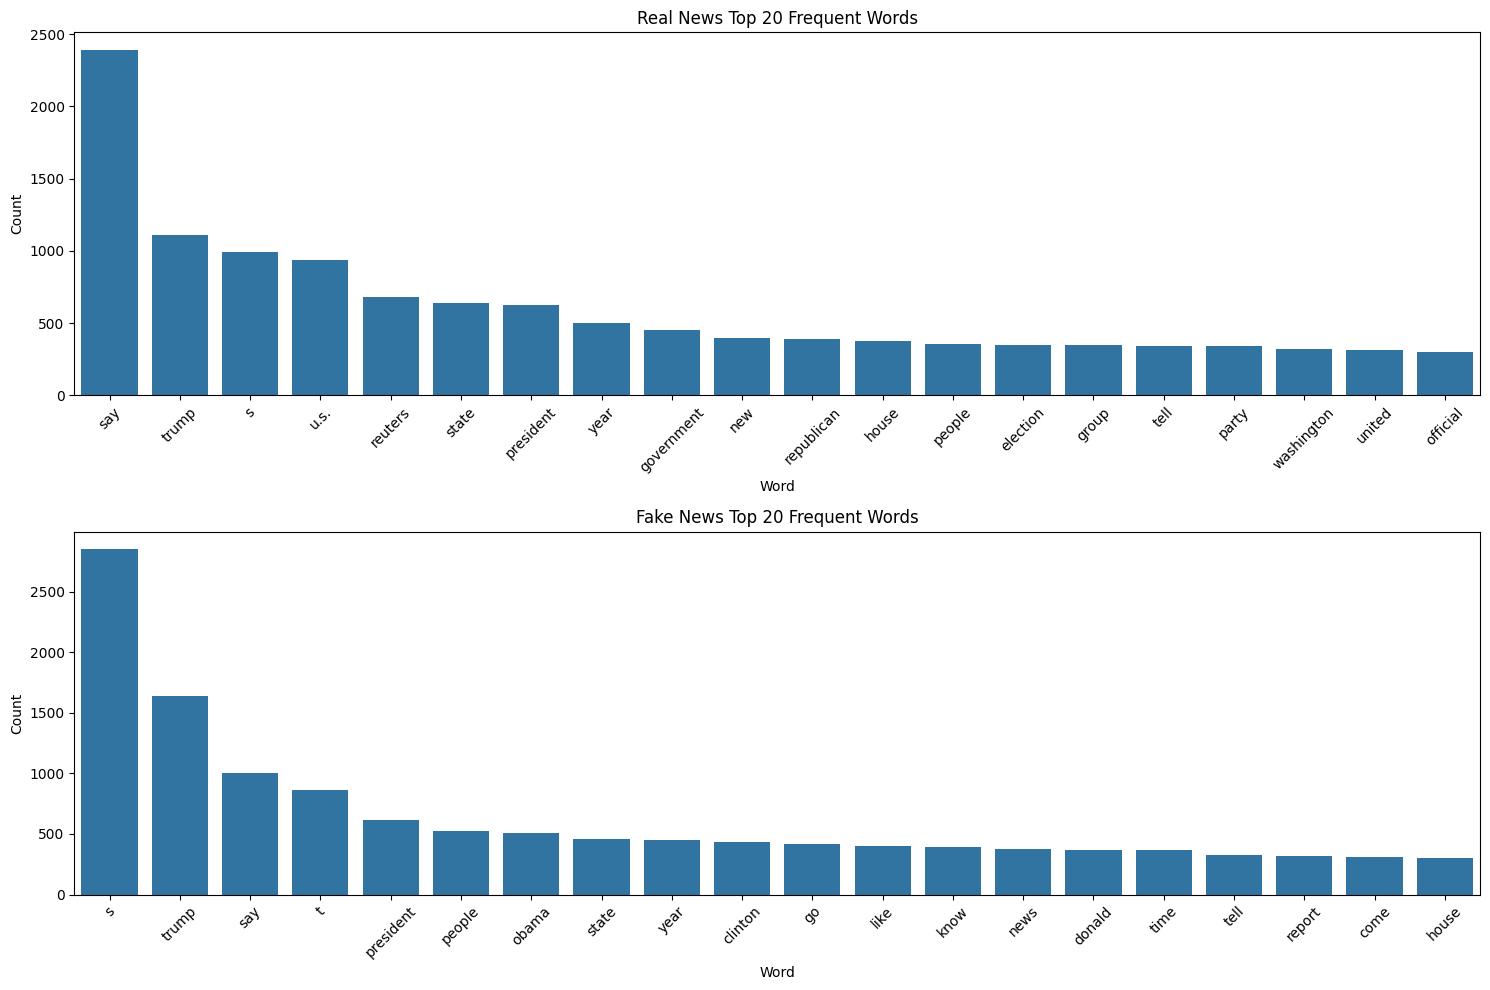

In [13]:
# Hint - use seaborn, subplots, and rotate tick lables
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
sns.barplot(real_count_df, x="Word", y="Count", ax=ax[0])
ax[0].set_title("Real News Top 20 Frequent Words")
ax[0].tick_params(axis='x', labelrotation=45)
 # ha='right' aligns the right end of the label with the tick
sns.barplot(fake_count_df, x="Word", y="Count", ax=ax[1])
ax[1].set_title("Fake News Top 20 Frequent Words")
ax[1].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

# Topic Modeling (Optional) - LDA topic Modeling with Gensim
- Train an LDA model with 10 topics
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization

In [14]:
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

In [15]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [16]:
# Process all texts - note this takes ~ 2 minutes to run
real_processed_docs = real["text"].sample(500, random_state=233857).apply(preprocess_text)
fake_processed_docs = fake["text"].sample(500, random_state=233857).apply(preprocess_text)

In [17]:
# Build dictionary - use our processed lemmas from previous step
dictionary = Dictionary(real_processed_docs) 
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filter rare/common words 
corpus = [dictionary.doc2bow(doc) for doc in real_processed_docs]

In [18]:
# train LDA model with 18 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

In [19]:
# print the top 10 words for each topic
print("\n--- Real News LDA Topics ---") 
for idx, topic in lda_model.print_topics(-1): 
    print(f"Topic: {idx} \nWords: {topic}\n")


--- Real News LDA Topics ---
Topic: 0 
Words: 0.020*"state" + 0.014*"city" + 0.009*"people" + 0.008*"year" + 0.006*"office" + 0.006*"mayor" + 0.006*"million" + 0.006*"accord" + 0.005*"official" + 0.005*"york"

Topic: 1 
Words: 0.012*"government" + 0.010*"china" + 0.009*"sign" + 0.009*"clinton" + 0.009*"foundation" + 0.008*"sale" + 0.007*"federal" + 0.006*"call" + 0.006*"marijuana" + 0.006*"work"

Topic: 2 
Words: 0.016*"party" + 0.013*"election" + 0.010*"state" + 0.009*"government" + 0.008*"rule" + 0.007*"percent" + 0.007*"democratic" + 0.007*"vote" + 0.006*"republican" + 0.006*"group"

Topic: 3 
Words: 0.044*"trump" + 0.011*"clinton" + 0.011*"republican" + 0.009*"campaign" + 0.008*"election" + 0.007*"russia" + 0.007*"presidential" + 0.006*"donald" + 0.006*"russian" + 0.006*"washington"

Topic: 4 
Words: 0.010*"state" + 0.008*"russia" + 0.008*"country" + 0.008*"trump" + 0.008*"year" + 0.007*"united" + 0.007*"obama" + 0.007*"paris" + 0.006*"force" + 0.006*"nuclear"

Topic: 5 
Words: 0.

In [20]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.013757  0.058440       1        1  17.705255
3     -0.089784 -0.008250       2        1  14.813912
8     -0.147825 -0.015745       3        1  13.698717
7      0.104402 -0.005343       4        1  13.010619
2     -0.067748 -0.041829       5        1  11.365878
9     -0.040898 -0.057537       6        1   8.588319
0     -0.007719 -0.060461       7        1   6.592338
4      0.024203  0.070723       8        1   6.406871
5      0.183563 -0.079495       9        1   5.486269
1      0.028049  0.139498      10        1   2.331821, topic_info=           Term         Freq        Total Category  logprob  loglift
204       trump  1089.000000  1089.000000  Default  30.0000  30.0000
561     clinton   200.000000   200.000000  Default  29.0000  29.0000
773       china   135.000000   135.000000  Default  28.0000  28.0000
529        city   172.000000   172.000000  Default  27.0000  27.0000
84   government   437.000000   437.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
380      states     8.062704   238.380713  Topic10  -5.4029   0.3719
219        year     9.068361   486.450009  Topic10  -5.2854  -0.2238
397      united     8.143827   295.675771  Topic10  -5.3929   0.1665
281     country     7.309362   279.912483  Topic10  -5.5010   0.1132
31         case     6.476624   113.083744  Topic10  -5.6220   0.8986

[685 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1915      2  0.128396  1997
1915      5  0.128396  1997
1915      6  0.641979  1997
2031      4  0.148060  2000
2031      5  0.740302  2000
...     ...       ...   ...
220       5  0.028009  york
220       6  0.056017  york
220       7  0.242742  york
220       8  0.018672  york
220      10  0.028009  york

[2583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 9, 8, 3, 10, 1, 5, 6, 2])

In [21]:
# fake

In [22]:
# Build dictionary - use our processed docs from previous step
dictionary = Dictionary(fake_processed_docs) 
dictionary.filter_extremes(no_below=5, no_above=0.5) # Filter rare/common words 
corpus = [dictionary.doc2bow(doc) for doc in fake_processed_docs]

In [23]:
# train LDA model with 18 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

In [24]:
# print the top 10 words for each topic
print("\n--- Fake News LDA Topics ---") 
for idx, topic in lda_model.print_topics(-1): 
    print(f"Topic: {idx} \nWords: {topic}\n")


--- Fake News LDA Topics ---
Topic: 0 
Words: 0.012*"county" + 0.011*"people" + 0.007*"right" + 0.006*"police" + 0.006*"time" + 0.006*"know" + 0.006*"like" + 0.005*"year" + 0.005*"state" + 0.005*"stand"

Topic: 1 
Words: 0.013*"year" + 0.012*"email" + 0.012*"department" + 0.011*"clinton" + 0.008*"official" + 0.007*"report" + 0.006*"state" + 0.006*"record" + 0.006*"investigation" + 0.006*"time"

Topic: 2 
Words: 0.030*"clinton" + 0.015*"hillary" + 0.009*"election" + 0.008*"state" + 0.007*"report" + 0.007*"obama" + 0.006*"party" + 0.006*"case" + 0.005*"email" + 0.005*"news"

Topic: 3 
Words: 0.020*"president" + 0.012*"donald" + 0.011*"obama" + 0.008*"people" + 0.007*"white" + 0.006*"news" + 0.006*"know" + 0.006*"like" + 0.006*"think" + 0.006*"house"

Topic: 4 
Words: 0.008*"donald" + 0.008*"state" + 0.008*"people" + 0.008*"white" + 0.007*"president" + 0.007*"know" + 0.006*"news" + 0.006*"right" + 0.006*"flag" + 0.006*"republican"

Topic: 5 
Words: 0.010*"russian" + 0.009*"russia" + 0.00

In [25]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.011314 -0.058775       1        1  16.753549
5     -0.056138  0.008289       2        1  15.750050
0      0.037756 -0.011403       3        1  14.921405
4      0.028783 -0.049485       4        1  10.086508
6      0.005318 -0.056415       5        1  10.069153
8      0.011467 -0.047722       6        1   8.032335
9     -0.012571  0.019727       7        1   7.751764
2     -0.070941 -0.003894       8        1   7.604345
1     -0.110105  0.102441       9        1   7.029732
7      0.155119  0.097237      10        1   2.001159, topic_info=         Term        Freq       Total Category  logprob  loglift
104   clinton  417.000000  417.000000  Default  30.0000  30.0000
1404   county  162.000000  162.000000  Default  29.0000  29.0000
124   hillary  228.000000  228.000000  Default  28.0000  28.0000
842     email  151.000000  151.000000  Default  27.0000  27.0000
995    police  218.000000  218.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
423      high    8.071983  123.501428  Topic10  -5.3105   1.1836
164    states    8.312434  150.308187  Topic10  -5.2811   1.0165
173    united    8.254812  167.555289  Topic10  -5.2881   0.9009
206   country    7.869794  229.490591  Topic10  -5.3358   0.5386
50       look    7.505116  175.471935  Topic10  -5.3833   0.7595

[708 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
746       1  0.070554  2016
746       2  0.105831  2016
746       3  0.082313  2016
746       4  0.058795  2016
746       5  0.152867  2016
...     ...       ...   ...
93        6  0.095591  year
93        7  0.088763  year
93        8  0.036415  year
93        9  0.166145  year
93       10  0.013656  year

[2828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 5, 7, 9, 10, 3, 2, 8])